In [13]:
# libraries
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras import regularizers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.optimizers import SGD # - Works
from tensorflow.keras.optimizers import RMSprop # - Works




train_path = "C:\\Users\\Ömer Ulu\\Desktop\\Emotion\\FER-2013_main\\train"
test_path = "C:\\Users\\Ömer Ulu\\Desktop\\Emotion\\FER-2013_main\\test"

In [33]:


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer = regularizers.l2(0.01),input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



#opt = Adam(learning_rate = 0.0001)
opt = Adam(learning_rate = 0.001) #olarak denenecek
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_34 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_34 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 128)      

from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
vgg = VGG16()
vgg_layers = vgg.layers

vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

model.add(Dense(7, activation="softmax"))

print(model.summary())


model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [30]:
batch_size = 128
# batch_size = 32 ile daha yüksek accuracy geliyor


#%% Data Generation - Train - Test

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator


train_datagen  = ImageDataGenerator()
test_datagen = ImageDataGenerator()


test_datagen = ImageDataGenerator(rescale= 1./255)
train_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size = (48,48),
        color_mode = "grayscale",
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size = (48,48),
        color_mode = "grayscale",
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [34]:
hist = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = test_generator,
                                validation_steps = test_generator.n//test_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/100


C:\Users\Ömer Ulu\AppData\Local\Temp\ipykernel_1272\3407852604.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


224/224 [==============================] - 376s 2s/step - loss: 1.8737 - accuracy: 0.2820 - val_loss: 1.9788 - val_accuracy: 0.2475 - lr: 0.0010
Epoch 2/100
224/224 [==============================] - 351s 2s/step - loss: 1.5067 - accuracy: 0.4249 - val_loss: 1.9257 - val_accuracy: 0.3156 - lr: 0.0010
Epoch 3/100
224/224 [==============================] - 352s 2s/step - loss: 1.3310 - accuracy: 0.4971 - val_loss: 1.4240 - val_accuracy: 0.4347 - lr: 0.0010
Epoch 4/100
224/224 [==============================] - 352s 2s/step - loss: 1.2338 - accuracy: 0.5327 - val_loss: 1.2563 - val_accuracy: 0.5232 - lr: 0.0010
Epoch 5/100
224/224 [==============================] - 351s 2s/step - loss: 1.1784 - accuracy: 0.5573 - val_loss: 1.2445 - val_accuracy: 0.5265 - lr: 0.0010
Epoch 6/100
224/224 [==============================] - 351s 2s/step - loss: 1.1153 - accuracy: 0.5818 - val_loss: 1.3562 - val_accuracy: 0.4796 - lr: 0.0010
Epoch 7/100
224/224 [==============================] - 350s 2s/step - 

hist = model.fit(
        train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=100,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


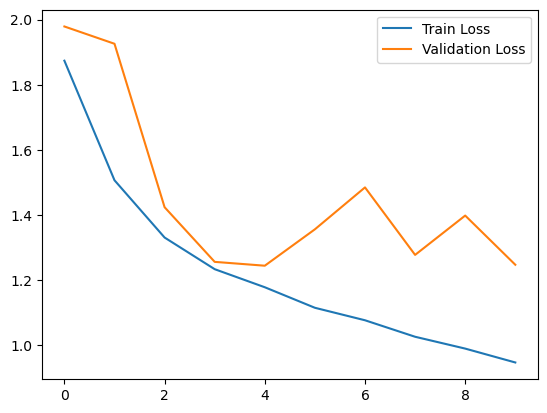

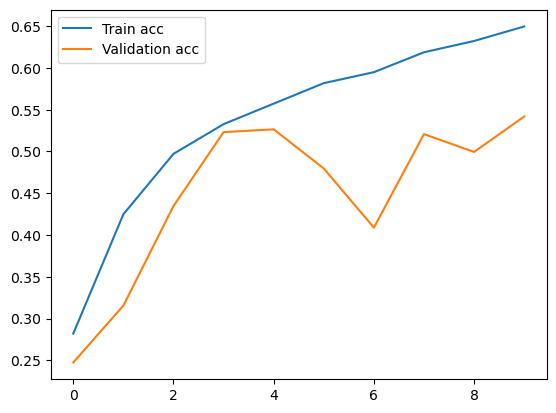

In [35]:

#Model Save
model.save_weights('model_7.h5')
model.save('model_7.h5')

#%% model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import confusion_matrix
import itertools



# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(test_generator)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_generator,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

57/57 [==============================] - 23s 404ms/step


KeyboardInterrupt: 

In [47]:
  
#%% save history
import json
with open("deneme2.json","w") as f:
    json.dump(str(hist.history), f)
    

    

In [38]:
import json
with open('deneme2.json', 'w', encoding='utf-8') as f:
    json.dump(float64(hist.history), f, ensure_ascii=False, indent=4)

NameError: name 'float64' is not defined

In [48]:
#%% load history
import codecs
with codecs.open("deneme2.json", "r",encoding = "utf-8") as f:
    h = json.loads(f.read())
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()   



TypeError: string indices must be integers